In [190]:
import os 

import pandas as pd
import numpy as np
import glob

In [193]:
print(os.getcwd())
%cd elizagoler/Documents/RecessionFertility

/Users
/Users/elizagoler/Documents/RecessionFertility


## From 2003 onwards, CDC Wonder has annual county-level fertility rates. I use those directly. ##

Read in data from 2007-2012

In [194]:
frates_2007_12 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_2007-2012.csv')

Clean data types and remove decimal points on county codes and years:

In [195]:
#frates_2007_12.dtypes
frates_2007_12['County Code'] = frates_2007_12['County Code'].astype(str).str.replace(r'\.0$', '', regex=True)
frates_2007_12['Year'] = frates_2007_12['Year'].astype(str).str.replace(r'\.0$', '', regex=True)

In [196]:
frates_2007_12.head()

,Notes,County,County Code,Year,Year Code,Births,Total Population,Birth Rate,Female Population,Fertility Rate
0,NaN,"Baldwin County, AL",1003,2007,2007.0,2281.0,172404.0,13.23,31772.0,71.79
1,NaN,"Baldwin County, AL",1003,2008,2008.0,2289.0,175827.0,13.02,32118.0,71.27
2,NaN,"Baldwin County, AL",1003,2009,2009.0,2125.0,179406.0,11.84,32356.0,65.68
3,NaN,"Baldwin County, AL",1003,2010,2010.0,2167.0,182265.0,11.89,32715.0,66.24
4,NaN,"Baldwin County, AL",1003,2011,2011.0,2157.0,186717.0,11.55,33387.0,64.61


Read in data file for 2003-2006:

In [197]:
frates_2003_06 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_2003-2006.csv')

Do the same cleaning here as I did above:

In [198]:
frates_2003_06['County Code'] = frates_2003_06['County Code'].astype(str).str.replace(r'\.0$', '', regex=True)
frates_2003_06['Year'] = frates_2003_06['Year'].astype(str).str.replace(r'\.0$', '', regex=True)

Concatenate the 2003-2012 data:

In [199]:
frates_2003_12 = pd.concat([frates_2003_06, frates_2007_12])

In [200]:
frates_2003_12.head()

,Notes,County,County Code,Year,Year Code,Births,Total Population,Birth Rate,Female Population,Fertility Rate
0,NaN,"Baldwin County, AL",1003,2003,2003.0,1860.0,151509.0,12.28,28759.0,64.68
1,NaN,"Baldwin County, AL",1003,2004,2004.0,1872.0,156266.0,11.98,29331.0,63.82
2,NaN,"Baldwin County, AL",1003,2005,2005.0,2099.0,162183.0,12.94,30201.0,69.50
3,NaN,"Baldwin County, AL",1003,2006,2006.0,2245.0,168121.0,13.35,31071.0,72.25
4,Total,"Baldwin County, AL",1003,nan,NaN,8076.0,638079.0,12.66,119362.0,67.66


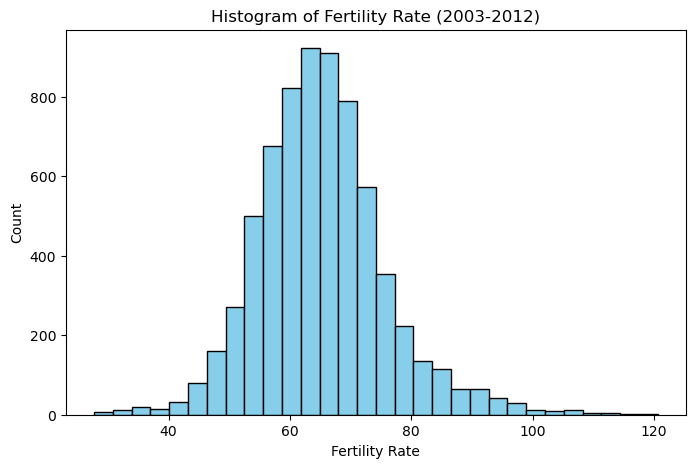

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(frates_2003_12['Fertility Rate'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fertility Rate (2003-2012)')
plt.xlabel('Fertility Rate')
plt.ylabel('Count')
plt.show()


## For 1995 to 2002, I use the annual count of births by county from CDC Wonder (numerator). I use SEER data to get the population of women ages 15-44 (denominator). ##

In [203]:
birth_counts_1995_2002 = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_1995-2002.csv')

In [204]:
birth_counts_1995_2002.head()

,Notes,County,County Code,Year,Year Code,Births
0,NaN,"Calhoun County, AL",1015.0,1995.0,1995.0,1520.0
1,NaN,"Calhoun County, AL",1015.0,1996.0,1996.0,1632.0
2,NaN,"Calhoun County, AL",1015.0,1997.0,1997.0,1588.0
3,NaN,"Calhoun County, AL",1015.0,1998.0,1998.0,1657.0
4,NaN,"Calhoun County, AL",1015.0,1999.0,1999.0,1586.0


In [205]:
# 1. Drop 'Year Code' column
if 'Year Code' in birth_counts_1995_2002.columns:
    birth_counts_1995_2002 = birth_counts_1995_2002.drop(columns=['Year Code'])

# 2. Remove '.0' from 'County Code' and 'Year' columns
for col in ['County Code', 'Year']:
    birth_counts_1995_2002[col] = (
        birth_counts_1995_2002[col]
        .astype(str)
        .str.replace(r'\.0$', '', regex=True)
    )

# 3. Clean 'Births': set missing, convert to int (no decimals)
# First, turn to str and identify missing
births_col = (
    birth_counts_1995_2002['Births']
    .astype(str)
    .replace(['nan', 'NaN', '', 'None'], pd.NA)
)
# Remove ".0", then convert
births_col = births_col.mask(births_col.isna(), None).str.replace(r'\.0$', '', regex=True)
# Convert to Int64 to allow NA, ensuring no decimals displayed
birth_counts_1995_2002['Births'] = pd.to_numeric(births_col, errors='coerce').astype('Int64')

# 4. Ensure correct dtypes for County Code and Year
birth_counts_1995_2002['County Code'] = birth_counts_1995_2002['County Code'].astype(str)
birth_counts_1995_2002['Year'] = birth_counts_1995_2002['Year'].astype(str)


In [206]:
birth_counts_1995_2002.head()

,Notes,County,County Code,Year,Births
0,NaN,"Calhoun County, AL",1015,1995,1520
1,NaN,"Calhoun County, AL",1015,1996,1632
2,NaN,"Calhoun County, AL",1015,1997,1588
3,NaN,"Calhoun County, AL",1015,1998,1657
4,NaN,"Calhoun County, AL",1015,1999,1586


In [207]:
birth_counts_1995_2002.dtypes

Notes          object
County         object
County Code    object
Year           object
Births          Int64
dtype: object

In [208]:
# Print one representative row for each state (state = last two letters of "County")
four_digit_rows = birth_counts_1995_2002[birth_counts_1995_2002['County Code'].str.len() == 4].copy()
four_digit_rows['State'] = four_digit_rows['County'].str[-2:]
print(four_digit_rows.groupby('State', as_index=False).head(1))


    Notes                 County County Code  Year  Births State
0     NaN     Calhoun County, AL        1015  1995    1520    AL
65    NaN  Anchorage Borough, AK        2020  1995    4453    AK
81    NaN    Maricopa County, AZ        4013  1995   44053    AZ
129   NaN     Pulaski County, AR        5119  1995    5636    AR
153   NaN     Alameda County, CA        6001  1995   20960    CA
433   NaN       Adams County, CO        8001  1995    4861    CO
513   NaN   Fairfield County, CT        9001  1995   12203    CT


Seems like the four digit county codes are missing a zero at the beginning

In [209]:
# Pad County Code with leading zero if it is four digits
birth_counts_1995_2002.loc[
    birth_counts_1995_2002['County Code'].str.len() == 4, 'County Code'
] = (
    '0' + birth_counts_1995_2002.loc[
        birth_counts_1995_2002['County Code'].str.len() == 4, 'County Code'
    ]
)


In [210]:
# Make all column names lowercase
birth_counts_1995_2002.columns = [col.lower() for col in birth_counts_1995_2002.columns]

# Rename 'county code' to 'county_fips'
birth_counts_1995_2002 = birth_counts_1995_2002.rename(columns={'county code': 'county_fips'})


In [211]:
birth_counts_1995_2002.head()

,notes,county,county_fips,year,births
0,NaN,"Calhoun County, AL",01015,1995,1520
1,NaN,"Calhoun County, AL",01015,1996,1632
2,NaN,"Calhoun County, AL",01015,1997,1588
3,NaN,"Calhoun County, AL",01015,1998,1657
4,NaN,"Calhoun County, AL",01015,1999,1586


Bringing in the population data for the relevant years:

In [212]:
gfr_women_pop_1969_2023_df = pd.read_csv('datastore/output/seer_population/gfr_women_pop_1969-2023.csv')

In [213]:
gfr_women_pop_1969_2023_df = gfr_women_pop_1969_2023_df.drop(columns=['fips_county_suffix'])


In [128]:
gfr_women_pop_1969_2023_df

,year,county_fips,gfr_women_pop
0,1969,1001,4941
1,1969,1003,11553
2,1969,1005,4311
3,1969,1007,2557
4,1969,1009,5228
...,...,...,...
171381,2023,56037,8163
171382,2023,56039,4477
171383,2023,56041,3858
171384,2023,56043,1218


In [123]:
gfr_women_pop_1995_2002_df = gfr_women_pop_1969_2023_df[gfr_women_pop_1969_2023_df['year'].isin(range(1995, 2003))]

In [214]:
gfr_women_pop_1995_2002_df['year'] = gfr_women_pop_1995_2002_df['year'].astype(str)
gfr_women_pop_1995_2002_df['county_fips'] = (
    gfr_women_pop_1995_2002_df['county_fips'].astype(str).str.zfill(5)
)
gfr_women_pop_1995_2002_df.dtypes

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/2395851824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_women_pop_1995_2002_df['year'] = gfr_women_pop_1995_2002_df['year'].astype(str)
/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/2395851824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_women_pop_1995_2002_df['county_fips'] = (


year             object
county_fips      object
gfr_women_pop     int64
dtype: object

In [215]:
gfr_women_pop_1995_2002_df.head()

,year,county_fips,gfr_women_pop
80395,1995,01001,8985
80396,1995,01003,25011
80397,1995,01005,5667
80398,1995,01007,3942
80399,1995,01009,9367


In [216]:
gfr_1995_2002_df = pd.merge(
    birth_counts_1995_2002,
    gfr_women_pop_1995_2002_df,
    how='left',
    left_on=['year', 'county_fips'],
    right_on=['year', 'county_fips']
)


In [217]:
num_counties_nan_gfr = gfr_1995_2002_df[
    (gfr_1995_2002_df['year'].astype(float) > 2005) & (gfr_1995_2002_df['gfr_women_pop'].isna())
]['county_fips'].nunique()
num_counties_nan_gfr


0

In [218]:
gfr_1995_2002_df.head()

,notes,county,county_fips,year,births,gfr_women_pop
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0
1,NaN,"Calhoun County, AL",01015,1996,1632,26296.0
2,NaN,"Calhoun County, AL",01015,1997,1588,26176.0
3,NaN,"Calhoun County, AL",01015,1998,1657,25982.0
4,NaN,"Calhoun County, AL",01015,1999,1586,24996.0


## There's a lot of missing stuff and I will deal with it later

In [219]:
# # List of excluded county names (accounting for state names in the 'county' field)
# excluded_county_names = [
#     "Yuma County, AZ",
#     "Adams County, CO",
#     "Boulder County, CO",
#     "Jefferson County, CO",
#     "Weld County, CO",
#     "Dade County, FL",
#     "Los Alamos County, NM",
#     "Valencia County, NM",
#     "New York County, NY",
#     "Washabaugh County, SD",
#     "Alleghany County, VA",
#     "Arlington County, VA",
#     "Henry County, VA",
#     "James City County, VA",
#     "Rockingham County, VA",
#     "Spotsylvania County, VA",
#     "Stafford County, VA",
#     "York County, VA",
#     "Alexandria City, VA",
#     "Clifton Forge City, VA",
#     "Covington City, VA",
#     "Falls Church City, VA",
#     "Fredericksburg City, VA",
#     "Galax City, VA",
#     "Harrisonburg City, VA",
#     "Martinsville City, VA",
#     "Norton City, VA",
#     "Williamsburg City, VA"
# ]
# 
# # Find counties not in the above list with NaN gfr_women_pop, and display all pairs as a list of tuples
# nan_gfr_mask = gfr_1995_2002_df['gfr_women_pop'].isna()
# not_excluded_mask = ~gfr_1995_2002_df['county'].isin(excluded_county_names)
# unmatched_nan_counties_df = gfr_1995_2002_df.loc[nan_gfr_mask & not_excluded_mask, ['county', 'year']].drop_duplicates()
# 
# # Show all such (county, year) as a list
# county_year_list = list(unmatched_nan_counties_df.itertuples(index=False, name=None))
# print("County and year pairs with NaN gfr_women_pop not in the excluded list (as a list):")
# print(county_year_list)


In [220]:
# Calculate fertility_rate
gfr_1995_2002_df['fertility_rate'] = (gfr_1995_2002_df['births'] / gfr_1995_2002_df['gfr_women_pop']) * 1000

In [221]:
# Count how many rows have fertility_rate as NA (null)
na_count = gfr_1995_2002_df['fertility_rate'].isna().sum()
print(f"Number of counties with fertility_rate = NA: {na_count}")

Number of counties with fertility_rate = NA: 483


In [222]:
# Show some rows where fertility_rate is not NA
print(gfr_1995_2002_df[gfr_1995_2002_df['fertility_rate'].notna()].head(10))

  notes                county county_fips  year  births  gfr_women_pop  \
0   NaN    Calhoun County, AL       01015  1995    1520        26466.0   
1   NaN    Calhoun County, AL       01015  1996    1632        26296.0   
2   NaN    Calhoun County, AL       01015  1997    1588        26176.0   
3   NaN    Calhoun County, AL       01015  1998    1657        25982.0   
4   NaN    Calhoun County, AL       01015  1999    1586        24996.0   
5   NaN    Calhoun County, AL       01015  2000    1528        23755.0   
6   NaN    Calhoun County, AL       01015  2001    1550        23649.0   
7   NaN    Calhoun County, AL       01015  2002    1455        23530.0   
8   NaN  Jefferson County, AL       01073  1995    9372       155228.0   
9   NaN  Jefferson County, AL       01073  1996    9005       154713.0   

   fertility_rate  
0       57.432177  
1       62.062671  
2       60.666259  
3       63.774921  
4       63.450152  
5         64.3233  
6       65.541883  
7       61.835954  
8    

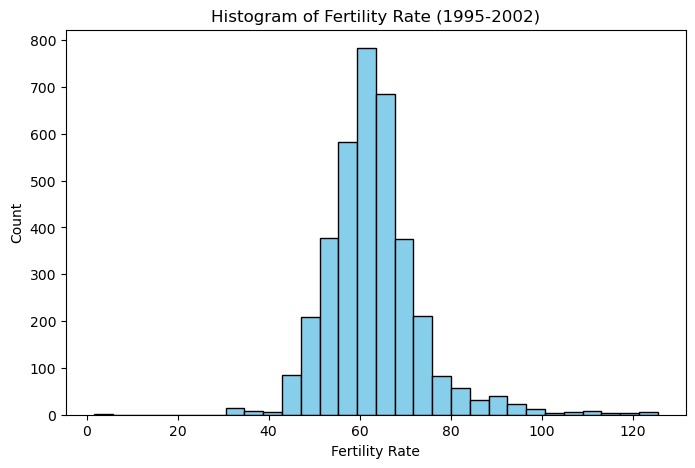

In [223]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(gfr_1995_2002_df['fertility_rate'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Fertility Rate (1995-2002)')
plt.xlabel('Fertility Rate')
plt.ylabel('Count')
plt.show()


In [ ]:
# Filter this data to only 1995
gfr_1995_wonder_df = gfr_1995_2002_df[gfr_1995_2002_df['year'] == '1995']
gfr_1995_wonder_df.head()


,notes,county,county_fips,year,births,gfr_women_pop,fertility_rate
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0,57.432177
8,NaN,"Jefferson County, AL",01073,1995,9372,155228.0,60.375705
16,NaN,"Madison County, AL",01089,1995,3846,63342.0,60.718007
24,NaN,"Mobile County, AL",01097,1995,6093,92128.0,66.136245
32,NaN,"Montgomery County, AL",01101,1995,3514,53740.0,65.38891


In [119]:
# Calculate the average fertility_rate in gfr_1995_wonder_df
avg_fertility_rate = gfr_1995_wonder_df['fertility_rate'].mean()
print(f"Average fertility_rate in gfr_1995_wonder_df: {avg_fertility_rate}")


Average fertility_rate in gfr_1995_wonder_df: 62.50240477881268


## Putting together data for years 1995-2012 only ##

In [229]:
#gfr_1995_wonder_df
#frates2003_12_df
# Make a copy to avoid modifying the original when displaying
frates_2003_12_head = frates_2003_12.copy()

# Add leading 0 to 4-digit County Code values (now 'county code'), coercing to str
frates_2003_12_head['County Code'] = (
    frates_2003_12_head['County Code']
    .astype(str)
    .str.zfill(5)
)

# Rename columns: all lower, replace spaces with _, and handle special columns
frates_2003_12_head = frates_2003_12_head.rename(
    columns={
        col: (
            col.lower()
              .replace(" ", "_")
              .replace("female_population", "gfr_women_pop")
              .replace("fertility_rate", "fertility_rate")
        )
        for col in frates_2003_12_head.columns
    }
)

# Special rename: 'county_code' to 'county_fips', and 'fertility_rate' if needed
frates_2003_12_head = frates_2003_12_head.rename(
    columns={'county_code': 'county_fips'}
)

frates_2003_12_head.head()

,notes,county,county_fips,year,year_code,births,total_population,birth_rate,gfr_women_pop,fertility_rate
0,NaN,"Baldwin County, AL",01003,2003,2003.0,1860.0,151509.0,12.28,28759.0,64.68
1,NaN,"Baldwin County, AL",01003,2004,2004.0,1872.0,156266.0,11.98,29331.0,63.82
2,NaN,"Baldwin County, AL",01003,2005,2005.0,2099.0,162183.0,12.94,30201.0,69.50
3,NaN,"Baldwin County, AL",01003,2006,2006.0,2245.0,168121.0,13.35,31071.0,72.25
4,Total,"Baldwin County, AL",01003,nan,NaN,8076.0,638079.0,12.66,119362.0,67.66


In [225]:
gfr_1995_2002_df.head()

,notes,county,county_fips,year,births,gfr_women_pop,fertility_rate
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0,57.432177
1,NaN,"Calhoun County, AL",01015,1996,1632,26296.0,62.062671
2,NaN,"Calhoun County, AL",01015,1997,1588,26176.0,60.666259
3,NaN,"Calhoun County, AL",01015,1998,1657,25982.0,63.774921
4,NaN,"Calhoun County, AL",01015,1999,1586,24996.0,63.450152


In [239]:
#Concatenate gfr_1995_2002_df and frates_2003_12_head along rows
gfr_1995_2012 = pd.concat([gfr_1995_2002_df, frates_2003_12_head], ignore_index=True)



In [ ]:
#gfr_1995_2012 = gfr_1995_2012.drop(columns=['year_code', 'total_population', 'birth_rate'], errors='ignore')
gfr_1995_2012.head()

,notes,county,county_fips,year,births,gfr_women_pop,fertility_rate
0,NaN,"Calhoun County, AL",01015,1995,1520.0,26466.0,57.432177
1,NaN,"Calhoun County, AL",01015,1996,1632.0,26296.0,62.062671
2,NaN,"Calhoun County, AL",01015,1997,1588.0,26176.0,60.666259
3,NaN,"Calhoun County, AL",01015,1998,1657.0,25982.0,63.774921
4,NaN,"Calhoun County, AL",01015,1999,1586.0,24996.0,63.450152


In [244]:
gfr_1995_2012.to_parquet("datastore/output/gfr_1995_2012.parquet", index=False)

## Now computing for years 1968-1994 ##

**Already computed births by county year in explore_natality.ipynb and saved it as a parquet. Bringing that in:**

Bring in the population data

In [167]:
gfr_women_pop_1969_1995_df = gfr_women_pop_1969_2023_df[gfr_women_pop_1969_2023_df['year'].isin(range(1969, 1996))]

In [168]:
gfr_women_pop_1969_1995_df = gfr_women_pop_1969_1995_df.rename(columns={'year': 'datayear', 'county_fips': 'fipsco'})
gfr_women_pop_1969_1995_df['fipsco'] = gfr_women_pop_1969_1995_df['fipsco'].astype(str).str.zfill(5)


In [177]:
# Ensure datayear is string in both DataFrames before merging
births_per_county_year['datayear'] = births_per_county_year['datayear'].astype(str)
gfr_women_pop_1969_1995_df['datayear'] = gfr_women_pop_1969_1995_df['datayear'].astype(str)

gfr_1969_1995_df = pd.merge(
    births_per_county_year,
    gfr_women_pop_1969_1995_df,
    how='left',
    left_on=['datayear', 'fipsco'],
    right_on=['datayear', 'fipsco']
)

In [178]:
women_pop_1969_2023 = women_pop_1969_2023.rename(columns={'county_fips': 'fipsco'})
women_pop_1969_2023 = women_pop_1969_2023.rename(columns={'year': 'datayear'})
women_pop_1969_2023.head()


,datayear,fipsco,fips_county_suffix,gfr_women_pop
0,1969,01001,1,4941
1,1969,01003,3,11553
2,1969,01005,5,4311
3,1969,01007,7,2557
4,1969,01009,9,5228


In [179]:
# Ensure columns are of the same type for merging
births_per_county_year['datayear'] = births_per_county_year['datayear'].astype(int)
births_per_county_year['fipsco'] = births_per_county_year['fipsco'].astype(str).str.zfill(5)

women_pop_1969_2023['datayear'] = women_pop_1969_2023['datayear'].astype(int)
women_pop_1969_2023['fipsco'] = women_pop_1969_2023['fipsco'].astype(str).str.zfill(5)

In [180]:
gfr_1969_1995 = births_per_county_year.merge(
    women_pop_1969_2023[['datayear', 'fipsco', 'gfr_women_pop']],
    on=['datayear', 'fipsco'],
    how='left'
)
gfr_1969_1995 = gfr_1969_1995[['datayear', 'fipsco', 'gfr_women_pop', 'births']]

In [181]:
gfr_1969_1995.head()

,datayear,fipsco,gfr_women_pop,births
0,1968,01001,NaN,488
1,1968,01003,NaN,1002
2,1968,01005,NaN,452
3,1968,01007,NaN,250
4,1968,01009,NaN,396


In [184]:
# Exclude rows with missing gfr_women_pop values
gfr_1969_1995_clean = gfr_1969_1995.dropna(subset=['gfr_women_pop'])
print(f"Number of rows after excluding missing gfr_women_pop: {len(gfr_1969_1995_clean)}")

# Calculate GFR if not already present
if 'gfr' not in gfr_1969_1995_clean.columns:
    gfr_1969_1995_clean['gfr'] = (gfr_1969_1995_clean['births'] / gfr_1969_1995_clean['gfr_women_pop']) * 1000


Number of rows after excluding missing gfr_women_pop: 63471


/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/1091529260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_1969_1995_clean['gfr'] = (gfr_1969_1995_clean['births'] / gfr_1969_1995_clean['gfr_women_pop']) * 1000


In [176]:
gfr_1969_1995.head()

,datayear,fipsco,gfr_women_pop,births
0,1968,01001,NaN,488
1,1968,01003,NaN,1002
2,1968,01005,NaN,452
3,1968,01007,NaN,250
4,1968,01009,NaN,396


In [46]:
gfr_1969_1995['gfr'] = (gfr_1969_1995['births'] / gfr_1969_1995['gfr_women_pop']) * 1000


In [47]:
gfr_1969_1995.head()

,datayear,fipsco,gfr_women_pop,births,gfr
3125,1969,01001,4941.0,221,44.727788
3126,1969,01003,11553.0,534,46.221761
3127,1969,01005,4311.0,226,52.424032
3128,1969,01007,2557.0,122,47.712163
3129,1969,01009,5228.0,225,43.037490


In [48]:
gfr_1968_1995 = gfr_1969_1995.copy()
gfr_1968_1995.to_parquet("datastore/output/gfr_1968_1995.parquet", index=False)


In [65]:
# Print a sample of the rows with gfr >= 80
gfr_over_80 = gfr_1968_1995[gfr_1968_1995['gfr'] >= 100]
print("Sample rows where GFR >= 80:")
print(gfr_over_80.sample(n=min(10, len(gfr_over_80))))

Sample rows where GFR >= 80:
       datayear fipsco  gfr_women_pop  births         gfr
57029      1986  16081          697.0      71  101.865136
43132      1981  46055          541.0      66  121.996303
37249      1979  49003         6754.0     876  129.700918
42564      1981  35037         2067.0     358  173.197871
50734      1984  16041         1736.0     196  112.903226
26082      1976  21047        13513.0    1425  105.454007
43543      1981  49045         5710.0     674  118.038529
51797      1984  30073         1370.0     138  100.729927
37079      1979  48169         1099.0     110  100.090992
40162      1980  48061        47364.0    5489  115.889705


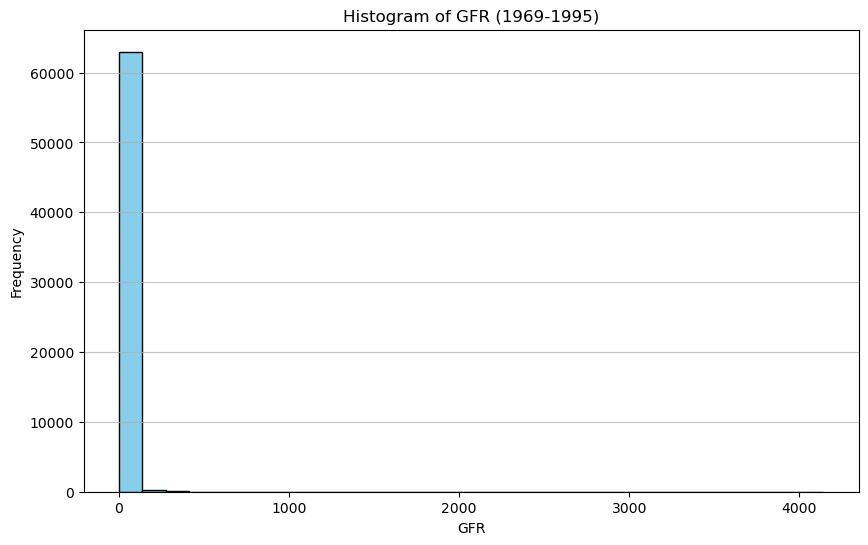

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(gfr_1968_1995['gfr'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of GFR (1969-1995)')
plt.xlabel('GFR')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [66]:
#Let's check to see if the crosswalk counties are right:
gfr_1995 = gfr_1968_1995[gfr_1968_1995['datayear'] == 1995]

In [75]:
wonder_df = pd.read_csv('datastore/raw/cdc_wonder/data/cdc_wonder_1995-2002.csv')
#wonder_1995_df = wonder_df[wonder_df['year'] == 1995]
wonder_df = wonder_df.rename(columns=lambda x: x.strip().lower())
wonder_df = wonder_df.rename(columns={'year': 'datayear', 'county code': 'cntyrfip', 'births': 'births_wonder'})

# Remove decimal points for specified columns (if they exist in DataFrame)
for col in ['cntyrfip', 'datayear', 'year code', 'births_wonder']:
    if col in wonder_df.columns:
        # Convert to str, then to int (to drop decimals), then back to str (if needed)
        wonder_df[col] = wonder_df[col].apply(lambda x: str(int(float(x))) if pd.notnull(x) else x)

wonder_df.head()

wonder_df_1995 = wonder_df[wonder_df['datayear'] == '1995']

In [68]:
gfr_1995.head()

,datayear,fipsco,gfr_women_pop,births,gfr
68709,1995,01015,26466.0,1520,57.432177
68710,1995,01073,155228.0,9372,60.375705
68711,1995,01089,63342.0,3846,60.718007
68712,1995,01097,92128.0,6093,66.136245
68713,1995,01101,53740.0,3514,65.388910


In [76]:
wonder_df_1995.head()

,notes,county,cntyrfip,datayear,year code,births_wonder
0,NaN,"Calhoun County, AL",1015,1995,1995,1520
8,NaN,"Jefferson County, AL",1073,1995,1995,9372
16,NaN,"Madison County, AL",1089,1995,1995,3846
24,NaN,"Mobile County, AL",1097,1995,1995,6093
32,NaN,"Montgomery County, AL",1101,1995,1995,3514


In [77]:
# Rename 'cntyrfip' to 'fipsco'
wonder_df_1995 = wonder_df_1995.rename(columns={'cntyrfip': 'fipsco'})

# Drop 'year code' column if present
if 'year code' in wonder_df_1995.columns:
    wonder_df_1995 = wonder_df_1995.drop(columns=['year code'])

# Add leading zeros to 'fipsco' so it is always 5 digits (e.g., '01015')
if 'fipsco' in wonder_df_1995.columns:
    wonder_df_1995['fipsco'] = wonder_df_1995['fipsco'].apply(lambda x: x.zfill(5) if pd.notnull(x) else x)


In [84]:
# Ensure 'datayear' is a string
gfr_1995['datayear'] = gfr_1995['datayear'].astype(str)
wonder_df_1995.head()

/var/folders/j4/z817ljzd6w99bjqkz9bgh5mh0000gn/T/ipykernel_24745/1305291268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gfr_1995['datayear'] = gfr_1995['datayear'].astype(str)


,notes,county,fipsco,datayear,births_wonder
0,NaN,"Calhoun County, AL",01015,1995,1520
8,NaN,"Jefferson County, AL",01073,1995,9372
16,NaN,"Madison County, AL",01089,1995,3846
24,NaN,"Mobile County, AL",01097,1995,6093
32,NaN,"Montgomery County, AL",01101,1995,3514


In [85]:
gfr_1995.dtypes

datayear          object
fipsco            object
gfr_women_pop    float64
births             int64
gfr              float64
dtype: object

In [86]:
merged_df = pd.merge(wonder_df_1995, gfr_1995, on=['fipsco', 'datayear'], how='inner')
merged_df.head()


,notes,county,fipsco,datayear,births_wonder,gfr_women_pop,births,gfr
0,NaN,"Calhoun County, AL",01015,1995,1520,26466.0,1520,57.432177
1,NaN,"Jefferson County, AL",01073,1995,9372,155228.0,9372,60.375705
2,NaN,"Madison County, AL",01089,1995,3846,63342.0,3846,60.718007
3,NaN,"Mobile County, AL",01097,1995,6093,92128.0,6093,66.136245
4,NaN,"Montgomery County, AL",01101,1995,3514,53740.0,3514,65.388910


In [89]:
merged_df.dtypes

notes             object
county            object
fipsco            object
datayear          object
births_wonder     object
gfr_women_pop    float64
births             int64
gfr              float64
dtype: object

In [90]:
# Convert 'births_wonder' to int64
merged_df['births_wonder'] = merged_df['births_wonder'].astype('int64')

# Calculate and return the share of rows where 'births_wonder' is not equal to 'births'
percent_not_equal = (merged_df['births_wonder'] != merged_df['births']).mean() * 100
print("Percent of rows where births_wonder != births: {:.2f}%".format(percent_not_equal))


Percent of rows where births_wonder != births: 0.45%


Using the crosswalk less than half a percent of the birth numbers I calculated from microdata differ from the CDC aggregated data. So the issue must be with the population of fertile women numbers.

In [188]:
# Print average 'gfr' for each year in 'datayears'
if 'datayear' in gfr_1969_1995.columns and 'gfr' in gfr_1969_1995.columns:
    avg_gfr_per_year = gfr_1969_1995.groupby('datayear')['gfr'].mean()
    print("Average GFR for each year:")
    print(avg_gfr_per_year)


In [162]:
# Print the rows with the largest GFR values, excluding county 51091
top_gfr_rows = gfr_1968_1995[gfr_1968_1995['fipsco'] != '51091'].sort_values(by='gfr', ascending=False).head(50)
print(top_gfr_rows)


       datayear fipsco  gfr_women_pop  births          gfr
42550      1981  35011          419.0    1235  2947.494033
42497      1981  32001         2991.0    8256  2760.280843
36277      1979  35011          422.0    1156  2739.336493
39414      1980  35011          437.0    1151  2633.867277
39361      1980  32001         2977.0    7798  2619.415519
36224      1979  32001         2894.0    7349  2539.391845
30004      1977  35011          408.0    1017  2492.647059
33087      1978  32001         2686.0    6538  2434.102755
26867      1976  35011          408.0     978  2397.058824
29951      1977  32001         2533.0    5986  2363.205685
26814      1976  32001         2483.0    5778  2327.023762
33140      1978  35011          443.0    1015  2291.196388
4918       1969  35011          392.0     806  2056.122449
8046       1970  35011          405.0     811  2002.469136
11183      1971  35011          418.0     824  1971.291866
68211      1994  04015        21697.0   42310  1950.0391